<a href="https://colab.research.google.com/github/ChacoGolden/Stat-Data-Science/blob/main/Otter_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plan - Roadmap pour tt le monde



* Transposer le travail du mid-term sur le notebook
* Reprendre les remarques du mid-term
* Introduction: Commencer par un contexte, et ajouter findings de la revue littéraire
* Revue biblio
* Présentation de la méthodologie
* Multicollinearity analysis
* EDA des control variables
* Transposer l'équation du sujet
* Tables avec les résultats des régressions (VIF + OLS)
* GROSSE DISCUSSION DE LA CAUSALITE




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
merged_data = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/Stat-Data-Science/refs/heads/main/Panel_Data_Inc_Edu_Infl_Wm_Hh_Age_Urb.csv')

In [6]:
merged_data.head()

,Country,Year,Waste,Income,Education,Inflation,Women,Household,Age,Urban
0,Belgium,2014,0.484672,21705.0,32.6,0.5,62.9,2.3,41.3,0.97833
1,Bulgaria,2014,0.376963,3311.0,23.6,-1.6,61.5,2.6,43.7,0.73651
2,Czechia,2014,0.310165,7622.0,19.1,0.4,64.7,2.4,40.8,0.73384
3,Denmark,2014,0.636289,27861.0,29.4,0.4,71.0,2.0,41.3,0.87410
4,Germany,2014,0.456714,19733.0,23.2,0.8,72.1,2.0,45.6,0.77190




---



# Introduction

\begin{equation}
\text{Waste}_{i,t} = \beta_0 + \beta_1 \text{Income}_{i,t} + \beta_2 \text{Education}_{i,t} + \beta_3 \text{Household}_{i,t} + \beta_4 \text{Urban}_{i,t} + \beta_5 \text{Age}_{i,t} + \alpha_i + \gamma_t + \varepsilon_{i,t}
\end{equation}

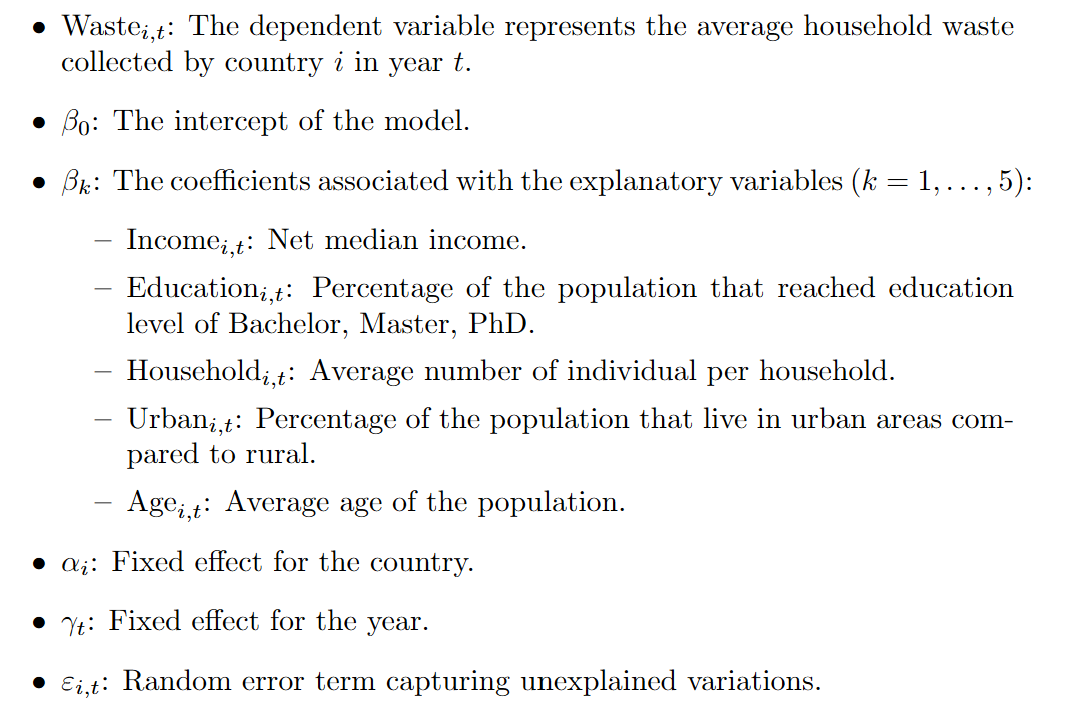

#Country Fixed Effects
These capture country-specific factors that remain constant over time, such as:


*   Institutional difference like government policies
*   Long-Standing cultural attitudes toward waste generation



#Year Fixed Effects
These capture time-specific effects that impact all countries in the same way during a specific year, such as:

Global economic crises.

*   Global economic crisis
*   Advances in waste management technology or practices
*   Internation agreements on environmental standard





# Literature Review

# Methods

In order to evaluate the impacts of the income, through consumption, on the generation of household waste, we used *X*. To control for *Y* due to factors other than *Z*, we included *V*. Furthermore, in order to control for unobservable differences among countries, we used a fixed effects estimator with country and year fixed effects. The
statistical specifications used follow the structure: *EQUATION*, where *W*.

*ajouter une table avec toutes les variables et leurs définitions*

# Materials and Univariate Analysis

# Multicollinearity analysis

In this section, we analyze the multicollinearity of our variables using a correlation matrix and Variance Inflation Factor (VIF) indicators.



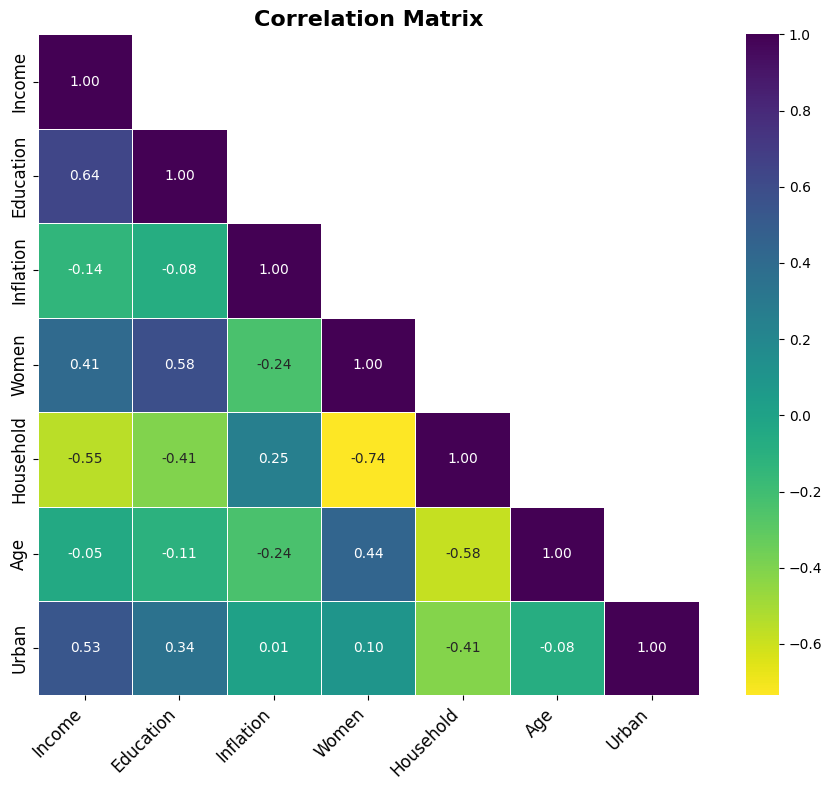

In [4]:
# Select the control variables
controls = merged_data[['Income', 'Education', 'Inflation', 'Women', 'Household', 'Age', 'Urban']]

# Compute the correlation matrix
correlation_matrix = controls.corr()

# Create a mask for the upper triangle, excluding the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Create a heatmap with the reversed color scale and mask
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    mask=mask,  # Mask the upper triangle but keep the diagonal
    annot=True,
    fmt='.2f',
    cmap='viridis_r',  # Reversed color scale
    cbar=True,
    square=True,
    linewidths=0.5,  # Adds light grid lines for visual separation
    annot_kws={"size": 10}  # Annotation text size
)
plt.title('Correlation Matrix', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [5]:
# Select the control variables
controls = merged_data[['Education', 'Inflation', 'Women', 'Household', 'Age', 'Urban']]

# Add a constant column for VIF calculation
controls_with_const = sm.add_constant(controls)

# Calculate VIF for each variable
vif_data = pd.DataFrame({
    'Variable': controls_with_const.columns,
    'VIF': [variance_inflation_factor(controls_with_const.values, i) for i in range(controls_with_const.shape[1])]
})

# Drop the constant term from the table
vif_data = vif_data[vif_data['Variable'] != 'const']

# Display the VIF table in Colab
print(vif_data)

    Variable       VIF
1  Education  2.300937
2  Inflation  1.094791
3      Women  3.749746
4  Household  4.437729
5        Age  2.348155
6      Urban  1.832418


# Results

# Discussion



*   Age: les vieux consomment moins + les vieux ont plus tendance à acheter pour les autres
*   Élément de liste



# References